In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm

df = pd.read_excel("donnees_immobilieres_extended.xlsx")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      150 non-null    int64  
 1   Surface_m2              150 non-null    float64
 2   Chambres                150 non-null    int64  
 3   Annee_construction      150 non-null    int64  
 4   Distance_centre_km      150 non-null    float64
 5   Etage                   150 non-null    int64  
 6   Ascenseur               150 non-null    int64  
 7   Annee_vente             150 non-null    int64  
 8   Qualite_ecole           150 non-null    float64
 9   Revenu_median_quartier  150 non-null    float64
 10  Distance_universite     150 non-null    float64
 11  Prix_milliers_euros     150 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 14.2 KB
None


In [6]:
print(df.describe())

               ID  Surface_m2    Chambres  Annee_construction  \
count  150.000000  150.000000  150.000000          150.000000   
mean    75.500000  116.706800    2.886667         2001.826667   
std     43.445368   37.693819    1.077760           11.704841   
min      1.000000   15.210000    1.000000         1980.000000   
25%     38.250000   93.240000    2.000000         1991.000000   
50%     75.500000  117.845000    3.000000         2002.500000   
75%    112.750000  139.637500    4.000000         2012.000000   
max    150.000000  218.530000    5.000000         2022.000000   

       Distance_centre_km       Etage   Ascenseur  Annee_vente  Qualite_ecole  \
count          150.000000  150.000000  150.000000   150.000000     150.000000   
mean            16.500267    2.580000    0.460000  2019.840000       5.468667   
std              9.017430    1.761901    0.500067     2.288225       1.868249   
min              0.830000    0.000000    0.000000  2015.000000       1.000000   
25%      

In [7]:
sk = df["Prix_milliers_euros"].skew()

Interprétation :
≈ 0 → symétrique
> 0 → asymétrie à droite
< 0 → asymétrie à gauche

In [8]:
kurt = df["Prix_milliers_euros"].kurt()

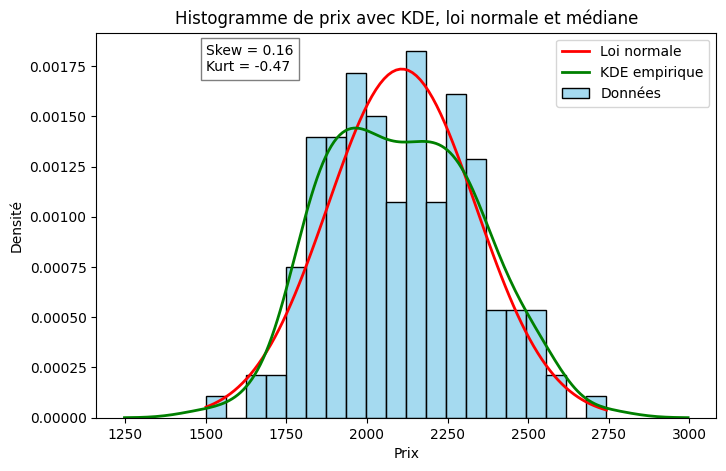

In [9]:
plt.figure(figsize=(8,5))

# Histogramme avec densité
sns.histplot(df["Prix_milliers_euros"], kde=False, stat='density', bins=20, color='skyblue', label='Données')

# Calculer la moyenne et l'écart-type
mu = df["Prix_milliers_euros"].mean()
sigma = df["Prix_milliers_euros"].std()

# Générer la loi normale
x = np.linspace(df["Prix_milliers_euros"].min(), df["Prix_milliers_euros"].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', lw=2, label='Loi normale')

# Courbe KDE empirique (suivant les données)
sns.kdeplot(df["Prix_milliers_euros"], color='green', lw=2, label='KDE empirique')

# Ajouter skew et kurtosis sur le graphique
plt.text(df["Prix_milliers_euros"].min(), plt.ylim()[1]*0.9, f'Skew = {sk:.2f}\nKurt = {kurt:.2f}', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title("Histogramme de prix avec KDE, loi normale et médiane")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.legend()
plt.show()

In [10]:
corr_matrix = df.corr()
print(corr_matrix)

                              ID  Surface_m2  Chambres  Annee_construction  \
ID                      1.000000    0.041265 -0.043645            0.056342   
Surface_m2              0.041265    1.000000  0.590959           -0.034333   
Chambres               -0.043645    0.590959  1.000000            0.039398   
Annee_construction      0.056342   -0.034333  0.039398            1.000000   
Distance_centre_km     -0.022305   -0.074765 -0.102319           -0.088117   
Etage                   0.101838    0.061126  0.048986           -0.044559   
Ascenseur              -0.158938   -0.062416 -0.014694           -0.100949   
Annee_vente             0.012962    0.060417  0.036140           -0.055920   
Qualite_ecole           0.051749    0.043832 -0.012775           -0.009887   
Revenu_median_quartier -0.098747    0.013908  0.011761            0.030304   
Distance_universite    -0.054580   -0.088362 -0.089609           -0.006250   
Prix_milliers_euros     0.031379    0.826731  0.614825          

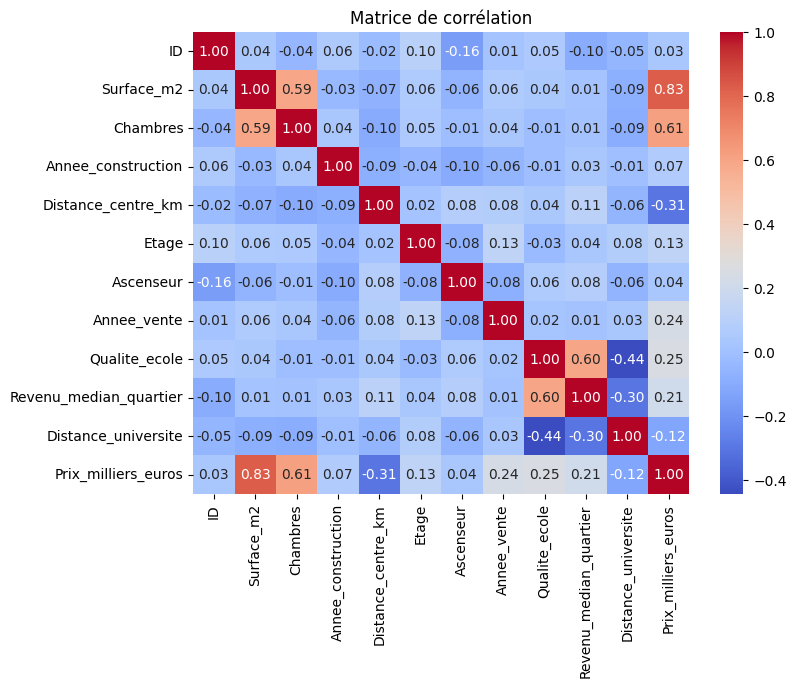

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

From stats - notebook1.
y = prix (donnée dépendante)
x = surface

In [12]:
# Exercise 1B: Manual OLS estimation

# TODO: Calculate sample means of x and y
y = df["Prix_milliers_euros"]
x = df["Surface_m2"]

x_bar = np.mean(x)
y_bar = np.mean(y)

# TODO: Calculate b1_hat using the OLS formula
numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar)**2)
b1_hat = numerator / denominator

# TODO: Calculate b0_hat
b0_hat = y_bar - b1_hat * x_bar

# TODO: Calculate fitted values: y_hat
y_hat = b0_hat + b1_hat * x 

# TODO: Calculate residuals: u_hat
u_hat = y - y_hat

print("OLS Estimates (Manual):")
print(f"b0_hat = {b0_hat:.4f}")
print(f"b1_hat = {b1_hat:.4f}")
print(f"\nMean of residuals: {np.mean(u_hat):.6f} (should be ≈ 0)")

OLS Estimates (Manual):
b0_hat = 1519.3743
b1_hat = 5.0428

Mean of residuals: 0.000000 (should be ≈ 0)


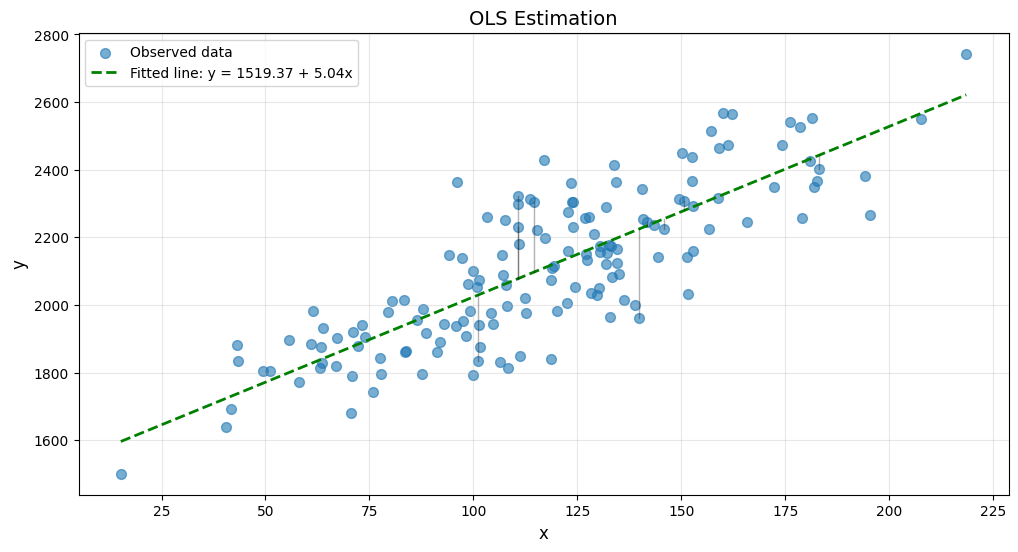

In [13]:
# Exercise 1C: Visualize OLS fit

plt.figure(figsize=(12, 6))

# Sort for smooth line plotting
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_hat_sorted = y_hat[sort_idx]

# TODO: Create a scatter plot of observed data
plt.scatter(x, y, alpha=0.6, label='Observed data', s=50)

# TODO: Plot the OLS fitted line
plt.plot(x_sorted, y_hat_sorted, 'g--', label=f'Fitted line: y = {b0_hat:.2f} + {b1_hat:.2f}x', linewidth=2)

# Show residuals for first 10 points (already implemented)
for i in range(10):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], 'k-', alpha=0.3, linewidth=1)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('OLS Estimation', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# Exercise 1D: Calculate R-squared

# TODO: Calculate SST (Total Sum of Squares)
SST = np.sum((y - y_bar)**2)

# TODO: Calculate SSR (Explained Sum of Squares)
SSR = np.sum((y_hat - y_bar)**2)

# TODO: Calculate SSE (Residual Sum of Squares)
SSE = np.sum((y - y_hat)**2)
#SSE = np.sum(u_hat**2)

# TODO: Calculate R-squared using Method 1: R2 = SSR / SST
R2_method1 = SSR / SST

# TODO: Calculate R-squared using Method 2: R2 = 1 - SSE / SST
R2_method2 = 1 - SSE / SST

print("Analysis of Variance:")
print(f"SST (Total Sum of Squares): {SST:.4f}")
print(f"SSR (Explained Sum of Squares): {SSR:.4f}")
print(f"SSE (Residual Sum of Squares): {SSE:.4f}")
print(f"\nVerification: SST = SSR + SSE?")
print(f"{SST:.4f} = {SSR:.4f} + {SSE:.4f} = {SSR + SSE:.4f}")
print(f"\nR² (Method 1: SSR/SST): {R2_method1:.4f}")
print(f"R² (Method 2: 1 - SSE/SST): {R2_method2:.4f}")
print(f"\nInterpretation: {R2_method1*100:.2f}% of the variance in y is explained by x")

Analysis of Variance:
SST (Total Sum of Squares): 7876687.1845
SSR (Explained Sum of Squares): 5383592.2807
SSE (Residual Sum of Squares): 2493094.9039

Verification: SST = SSR + SSE?
7876687.1845 = 5383592.2807 + 2493094.9039 = 7876687.1845

R² (Method 1: SSR/SST): 0.6835
R² (Method 2: 1 - SSE/SST): 0.6835

Interpretation: 68.35% of the variance in y is explained by x


In [15]:
n = df.shape[0]        # nombre d'observations
p = 1                  # nombre de variables explicatives

R2_adj = 1 - (1 - R2_method1) * (n - 1) / (n - p - 1)
print("R² ajusté :", R2_adj)

R² ajusté : 0.6813457128760424


Avec une seule variable explicative, R² et R² ajusté sont presque identiques.
Si tu ajoutes d’autres variables, R² ajusté devient utile pour voir si elles améliorent vraiment le modèle.

B0 = prix de base quand surface = 0
B1 = variation du prix par unité de surface

In [16]:
# Exercise 5: Multiple Linear Regression

X_matrix = df[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur" ]].values
y_multi = df["Prix_milliers_euros"]
X_matrix = np.column_stack([np.ones(len(df)), X_matrix])

# TODO: Implement OLS using matrix algebra
# b_hat = (X'X)^(-1) X'y
XtX = X_matrix.T @ X_matrix
XtX_inv = np.linalg.inv(XtX)
Xty = X_matrix.T @ y_multi
b_hat_multi = XtX_inv @ Xty

print("Multiple Linear Regression Results:\n")
print("True coefficients:")
#print(f"b0 = {b_true[0]}, b1 = {b_true[1]}, b2 = {b_true[2]}, b3 = {b_true[3]}")
print("\nEstimated coefficients:")
print(f"b0_hat = {b_hat_multi[0]:.4f}")
print(f"b1_hat = {b_hat_multi[1]:.4f}")
print(f"b2_hat = {b_hat_multi[2]:.4f}")
print(f"b3_hat = {b_hat_multi[3]:.4f}")
print(f"b4_hat = {b_hat_multi[4]:.4f}")
print(f"b5_hat = {b_hat_multi[5]:.4f}")
print(f"b6_hat = {b_hat_multi[6]:.4f}")

# Calculate fitted values and residuals
y_hat_multi = X_matrix @ b_hat_multi
u_hat_multi = y_multi - y_hat_multi

# Calculate R-squared
SST_multi = np.sum((y_multi - np.mean(y_multi))**2)
SSE_multi = np.sum(u_hat_multi**2)
R2_multi = 1 - SSE_multi / SST_multi

# Calculate adjusted R-squared
k = X_matrix.shape[1]  # number of parameters
R2_adj_multi = 1 - (len(df) - 1) / (len(df) - k) * (1 - R2_multi)

print(f"\nR² = {R2_multi:.4f}")
print(f"Adjusted R² = {R2_adj_multi:.4f}")

Multiple Linear Regression Results:

True coefficients:

Estimated coefficients:
b0_hat = -1679.4908
b1_hat = 4.3879
b2_hat = 33.9205
b3_hat = 1.6093
b4_hat = -6.1446
b5_hat = 12.2540
b6_hat = 55.5141

R² = 0.7887
Adjusted R² = 0.7798


B0 = intercept, -1679.4908
B1 = coefficient surface, 4.3879
B2 = coefficient chambres, 33.9205
B3 = coefficient annees construction, 1.6093
B4 = coefficient distance centre, -6.1446
B5 = coefficient etage, 12.2540
B6 = coefficient ascenseur, 55.5141

In [17]:
# Exercise 5B: Verify with statsmodels

model_multi = sm.OLS(y_multi, X_matrix).fit()
print("Statsmodels OLS Summary:")
print(model_multi.summary())

# Compare estimates
print("\n" + "="*60)
print("Comparison of estimates:")
print("="*60)
print(f"{'Parameter':<12} {'Manual':<12} {'Statsmodels':<12} {'Difference':<12}")
print("-"*60)
for i in range(len(b_hat_multi)):
    diff = abs(b_hat_multi[i] - model_multi.params[i])
    print(f"b{i:<11} {b_hat_multi[i]:<12.6f} {model_multi.params[i]:<12.6f} {diff:<12.8f}")



Statsmodels OLS Summary:
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.789
Model:                             OLS   Adj. R-squared:                  0.780
Method:                  Least Squares   F-statistic:                     88.94
Date:                 Mon, 15 Dec 2025   Prob (F-statistic):           9.10e-46
Time:                         21:19:30   Log-Likelihood:                -911.43
No. Observations:                  150   AIC:                             1837.
Df Residuals:                      143   BIC:                             1858.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1679.

C:\Users\alize\AppData\Local\Temp\ipykernel_11072\1854246588.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = abs(b_hat_multi[i] - model_multi.params[i])
C:\Users\alize\AppData\Local\Temp\ipykernel_11072\1854246588.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"b{i:<11} {b_hat_multi[i]:<12.6f} {model_multi.params[i]:<12.6f} {diff:<12.8f}")


In [24]:
# Fit different models
models = {}

# 1. Linear-Linear
X_multi_const = sm.add_constant(X_matrix)
models['linear-linear'] = sm.OLS(y_multi, X_multi_const).fit()

# 2. Log-Linear
X_multi_const = sm.add_constant(X_matrix)
Y_multi_log = np.log(y_multi)
models['log-linear'] = sm.OLS(Y_multi_log, X_multi_const).fit()

# 3. Linear-Log
X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
models['linear-log'] = sm.OLS(y_multi, X_multi_log_const).fit()

# 4. Log-Log
X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
Y_multi_log = np.log(y_multi)
models['log-log'] = sm.OLS(Y_multi_log, X_multi_log_const).fit()

# Compare R-squared values
print("Model Comparison:\n")
for name, model in models.items():
    print(f"{name:15} R² = {model.rsquared:.4f}")
    print(f"                Coefficients: b0 = {model.params[0]:.4f}, b1 = {model.params[1]:.4f}, \n"
          f"                              b2 = {model.params[2]:.4f}, b3 = {model.params[3]:.4f}, \n"
          f"                              b4 = {model.params[4]:.4f}, b5 = {model.params[5]:.4f}, b6 = {model.params[6]:.4f} ")
    print()

Model Comparison:

linear-linear   R² = 0.7887
                Coefficients: b0 = -1679.4908, b1 = 4.3879, 
                              b2 = 33.9205, b3 = 1.6093, 
                              b4 = -6.1446, b5 = 12.2540, b6 = 55.5141 

log-linear      R² = 0.7916
                Coefficients: b0 = 5.8413, b1 = 0.0021, 
                              b2 = 0.0152, b3 = 0.0008, 
                              b4 = -0.0030, b5 = 0.0053, b6 = 0.0265 

linear-log      R² = 0.7128
                Coefficients: b0 = -15994776286.1695, b1 = 396.7781, 
                              b2 = 105.3778, b3 = 2144.5818, 
                              b4 = -52.5345, b5 = 2.2356, b6 = 4.0169 

log-log         R² = 0.7356
                Coefficients: b0 = -1100749.8256, b1 = 0.1955, 
                              b2 = 0.0475, b3 = 1.0343, 
                              b4 = -0.0249, b5 = 0.0009, b6 = 0.0019 



C:\Users\alize\AppData\Local\Temp\ipykernel_11072\2043073336.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"                Coefficients: b0 = {model.params[0]:.4f}, b1 = {model.params[1]:.4f}, \n"
C:\Users\alize\AppData\Local\Temp\ipykernel_11072\2043073336.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"                              b2 = {model.params[2]:.4f}, b3 = {model.params[3]:.4f}, \n"
C:\Users\alize\AppData\Local\Temp\ipykernel_11072\2043073336.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

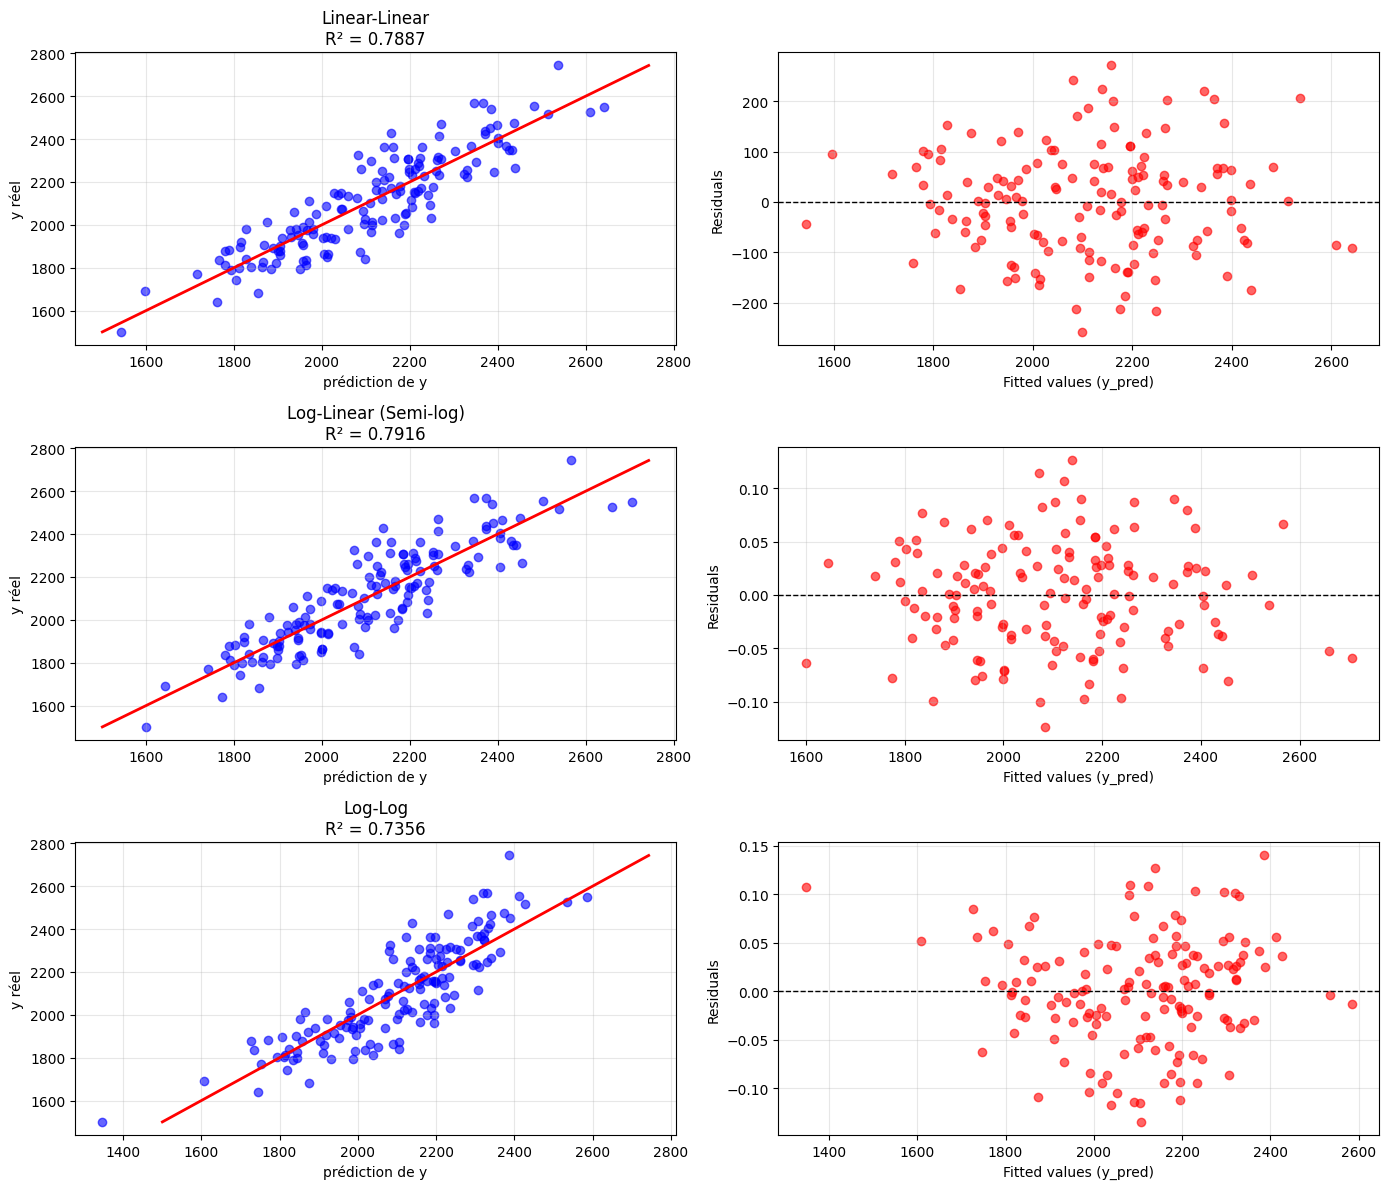

In [57]:


# Exercise 4A: Visualize different functional forms

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

indices = range(len(y_multi))

# 1. Linear-Linear
X_multi_const = sm.add_constant(X_matrix)
y_pred = models['linear-linear'].predict(X_multi_const)
axes[0, 0].scatter(y_pred, y_multi, alpha=0.6, color='blue')
axes[0, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[0, 0].set_xlabel('prédiction de y')
axes[0, 0].set_ylabel('y réel')
axes[0, 0].set_title(f'Linear-Linear\nR² = {models["linear-linear"].rsquared:.4f}')
axes[0, 0].grid(True, alpha=0.3)

lin_residuals = models['linear-linear'].resid         # résidus : y_i - y_pred_i
axes[0, 1].scatter(y_pred, lin_residuals, alpha=0.6,color='red')
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_xlabel('Fitted values (y_pred)')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)


# 2. Log-Linear
X_multi_const = sm.add_constant(X_matrix)
log_y_pred = models['log-linear'].predict(sm.add_constant(X_multi_const))
y_pred_from_log = np.exp(log_y_pred)
axes[1, 0].scatter(y_pred_from_log, y_multi, alpha=0.6, color='blue')
axes[1, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[1, 0].set_xlabel('prédiction de y')
axes[1, 0].set_ylabel('y réel')
axes[1, 0].set_title(f'Log-Linear (Semi-log)\nR² = {models["log-linear"].rsquared:.4f}')
axes[1, 0].grid(True, alpha=0.3)

log_lin_residuals = models['log-linear'].resid     
axes[1, 1].scatter(y_pred_from_log, log_lin_residuals, alpha=0.6,color='red')
axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Fitted values (y_pred)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid(True, alpha=0.3)

# 3. Linear-Log (non demandé par le prof)
'''X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
y_pred_log = models['linear-log'].predict(sm.add_constant(X_multi_log_const))
axes[1, 0].scatter(y_pred, y_multi, alpha=0.6, color='blue')
axes[1, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[1, 0].set_xlabel('prédiction de y')
axes[1, 0].set_ylabel('y réel')
axes[1, 0].set_title(f'Linear-Log\nR² = {models["linear-log"].rsquared:.4f}')
axes[1, 0].grid(True, alpha=0.3)'''

# 4. Log-Log
X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
log_y_pred_log = models['log-log'].predict(sm.add_constant(X_multi_log_const))
log_y_pred_from_log = np.exp(log_y_pred_log)
axes[2, 0].scatter(log_y_pred_from_log, y_multi, alpha=0.6, color='blue')
axes[2, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[2, 0].set_xlabel('prédiction de y')
axes[2, 0].set_ylabel('y réel')
axes[2, 0].set_title(f'Log-Log\nR² = {models["log-log"].rsquared:.4f}')
axes[2, 0].grid(True, alpha=0.3)

log_log_residuals = models['log-log'].resid     
axes[2, 1].scatter(log_y_pred_from_log, log_log_residuals, alpha=0.6,color='red')
axes[2, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2, 1].set_xlabel('Fitted values (y_pred)')
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

